In [3]:
from bs4 import BeautifulSoup
import requests

CONSIDERING PARTY WISE RESULTS FOR SAMPLE

In [4]:

url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [5]:
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_conf

In [6]:
soup.find_all('table')[0]

<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                              

In [7]:
table = soup.find_all('table',class_='table')[0]

#<table class="table">


In [8]:
print(table)

<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                              

In [9]:
world_titles = table.find_all('th')[:-4]

In [10]:
world_titles

[<th style="text-align: left;">Party</th>,
 <th style="text-align:right">Won</th>,
 <th style="text-align:right">Leading</th>,
 <th style="text-align:right">Total</th>]

In [11]:
world_table_titles = [title.text for title in world_titles]
print(world_table_titles)

['Party', 'Won', 'Leading', 'Total']


In [12]:
import pandas as pd

In [13]:
df=pd.DataFrame(columns = world_table_titles)
df

,Party,Won,Leading,Total


In [14]:
column_data = table.find_all('tr')[:-1]

In [15]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length=len(df)
    df.loc[length] = individual_row_data

In [16]:
df

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22
5,Telugu Desam - TDP,16,0,16
6,Janata Dal (United) - JD(U),12,0,12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,0,9
8,Nationalist Congress Party – Sharadchandra Paw...,8,0,8
9,Shiv Sena - SHS,7,0,7


In [17]:
df.describe()

,Party,Won,Leading,Total
count,42,42,42,42
unique,42,15,1,15
top,Bharatiya Janata Party - BJP,1,0,1
freq,1,17,42,17


In [33]:
df['Won'] = df['Won'].astype(int)
df['Total'] = df['Total'].astype(int)
df['Leading'] = df["Leading"].astype(int)

In [59]:
columns_to_display = ['Party', 'Won', 'Leading', 'Total', 'Percentage']

In [60]:
#Top Parties

top_parties = df.nlargest(5, 'Won')[columns_to_display]
print(top_parties)

                                 Party  Won  Leading  Total  Percentage
0         Bharatiya Janata Party - BJP  240        0    240   44.198895
1       Indian National Congress - INC   99        0     99   18.232044
2                 Samajwadi Party - SP   37        0     37    6.813996
3  All India Trinamool Congress - AITC   29        0     29    5.340700
4      Dravida Munnetra Kazhagam - DMK   22        0     22    4.051565


In [61]:
#Least Seats
least_n_parties = df.nsmallest(5, 'Won')[columns_to_display]
print(least_n_parties)

                                      Party  Won  Leading  Total  Percentage
24    United People’s Party, Liberal - UPPL    1        0      1    0.184162
25                 Asom Gana Parishad - AGP    1        0      1    0.184162
26  Hindustani Awam Morcha (Secular) - HAMS    1        0      1    0.184162
27                    Kerala Congress - KEC    1        0      1    0.184162
28      Revolutionary Socialist Party - RSP    1        0      1    0.184162


In [36]:

#Total Seats Distribution
total_seats = df['Total'].sum()
print(f"Total seats: {total_seats}")

Total seats: 543


In [37]:
#Percentage of Seats
df['Percentage'] = (df['Won'] / total_seats) * 100
print(df[['Party', 'Percentage']])

                                                Party  Percentage
0                        Bharatiya Janata Party - BJP   44.198895
1                      Indian National Congress - INC   18.232044
2                                Samajwadi Party - SP    6.813996
3                 All India Trinamool Congress - AITC    5.340700
4                     Dravida Munnetra Kazhagam - DMK    4.051565
5                                  Telugu Desam - TDP    2.946593
6                        Janata Dal  (United) - JD(U)    2.209945
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    1.657459
8   Nationalist Congress Party – Sharadchandra Paw...    1.473297
9                                     Shiv Sena - SHS    1.289134
10             Lok Janshakti Party(Ram Vilas) - LJPRV    0.920810
11      Yuvajana Sramika Rythu Congress Party - YSRCP    0.736648
12                         Rashtriya Janata Dal - RJD    0.736648
13       Communist Party of India  (Marxist) - CPI(M)    0.736648
14        

In [38]:
#Cumulative Seats
df['Cumulative'] = df['Won'].cumsum()
print(df[['Party', 'Cumulative']])


                                                Party  Cumulative
0                        Bharatiya Janata Party - BJP         240
1                      Indian National Congress - INC         339
2                                Samajwadi Party - SP         376
3                 All India Trinamool Congress - AITC         405
4                     Dravida Munnetra Kazhagam - DMK         427
5                                  Telugu Desam - TDP         443
6                        Janata Dal  (United) - JD(U)         455
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT         464
8   Nationalist Congress Party – Sharadchandra Paw...         472
9                                     Shiv Sena - SHS         479
10             Lok Janshakti Party(Ram Vilas) - LJPRV         484
11      Yuvajana Sramika Rythu Congress Party - YSRCP         488
12                         Rashtriya Janata Dal - RJD         492
13       Communist Party of India  (Marxist) - CPI(M)         496
14        

In [62]:
# Seats Won by Top N Parties

top_n_parties = df.nlargest(5, 'Won')[columns_to_display]
print(top_n_parties)

                                 Party  Won  Leading  Total  Percentage
0         Bharatiya Janata Party - BJP  240        0    240   44.198895
1       Indian National Congress - INC   99        0     99   18.232044
2                 Samajwadi Party - SP   37        0     37    6.813996
3  All India Trinamool Congress - AITC   29        0     29    5.340700
4      Dravida Munnetra Kazhagam - DMK   22        0     22    4.051565


In [58]:
#Party Representation

party_representation = df[df['Won'] > 15][columns_to_display]
print(party_representation)

                                 Party  Won  Leading  Total  Percentage
0         Bharatiya Janata Party - BJP  240        0    240   44.198895
1       Indian National Congress - INC   99        0     99   18.232044
2                 Samajwadi Party - SP   37        0     37    6.813996
3  All India Trinamool Congress - AITC   29        0     29    5.340700
4      Dravida Munnetra Kazhagam - DMK   22        0     22    4.051565
5                   Telugu Desam - TDP   16        0     16    2.946593


In [43]:

# Party Comparison
party_comparison = df[['Party', 'Won']].sort_values(by='Won', ascending=False)
print(party_comparison)


                                                Party  Won
0                        Bharatiya Janata Party - BJP  240
1                      Indian National Congress - INC   99
2                                Samajwadi Party - SP   37
3                 All India Trinamool Congress - AITC   29
4                     Dravida Munnetra Kazhagam - DMK   22
5                                  Telugu Desam - TDP   16
6                        Janata Dal  (United) - JD(U)   12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9
8   Nationalist Congress Party – Sharadchandra Paw...    8
41                                  Independent - IND    7
9                                     Shiv Sena - SHS    7
10             Lok Janshakti Party(Ram Vilas) - LJPRV    5
12                         Rashtriya Janata Dal - RJD    4
13       Communist Party of India  (Marxist) - CPI(M)    4
11      Yuvajana Sramika Rythu Congress Party - YSRCP    4
14                  Indian Union Muslim League - IUML   

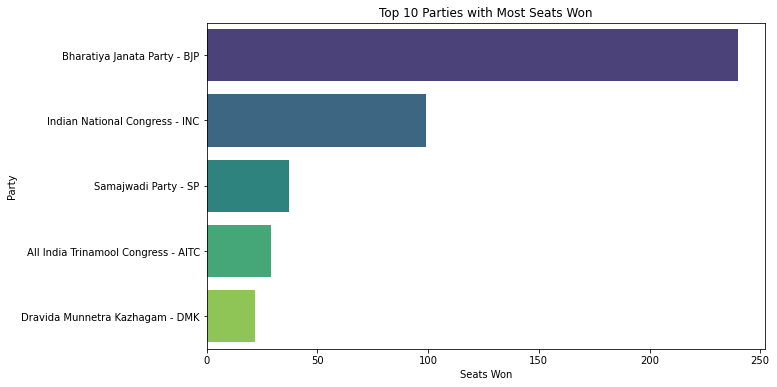

In [45]:
# Data Visualization

#Top 10 Parties with most seats won
plt.figure(figsize=(10, 6))
sns.barplot(x='Won', y='Party', data=top_n_parties, palette='viridis')
plt.title('Top 10 Parties with Most Seats Won')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.show()


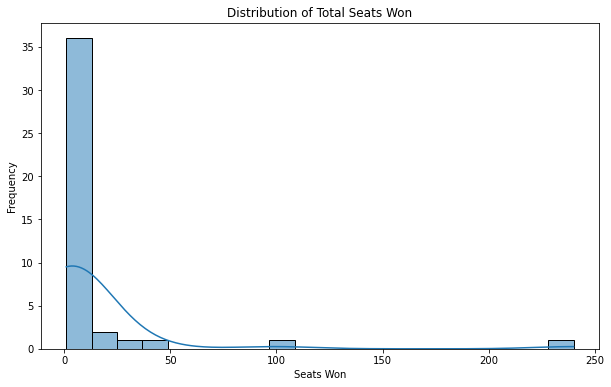

In [47]:
#Histogram: Distribution of total seats won
plt.figure(figsize=(10, 6))
sns.histplot(df['Won'], bins=20, kde=True)
plt.title('Distribution of Total Seats Won')
plt.xlabel('Seats Won')
plt.ylabel('Frequency')
plt.show()

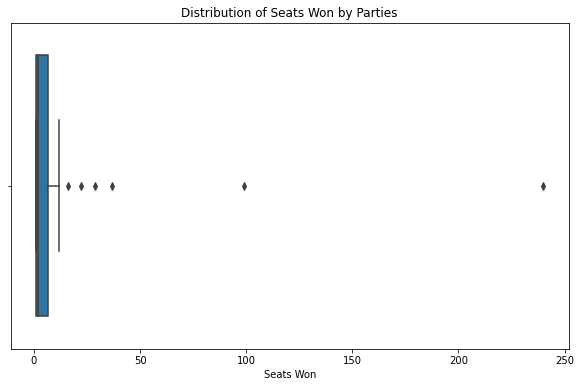

In [48]:
#Distribution of seats won by different parties
plt.figure(figsize=(10, 6))
sns.boxplot(x='Won', data=df)
plt.title('Distribution of Seats Won by Parties')
plt.xlabel('Seats Won')
plt.show()